In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
if not os.getcwd() == '/NN_project':
    os.chdir('..')

import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

pd.set_option("display.max_columns", 101)

tensorboard_logs_dir = 'gcloud/logs/TensorBoard/'
logs = 'gcloud/logs/log.json'

In [2]:
pickle_file_test = 'data/preprocessed/VOC2012/preprocessed_test.pkl'
df_test = pd.read_pickle(pickle_file_test)

In [3]:
df_logs = pd.read_json(logs, lines=True)
df_logs = df_logs.join(pd.io.json.json_normalize(df_logs['parameters']))
df_logs = df_logs.join(pd.io.json.json_normalize(df_logs['val_metrics']))
df_logs = df_logs.drop(['parameters', 'val_metrics'], axis=1)
df_logs

log_name optimizer  learning_rate  epochs  batch_size  \
0   2019-11-30-09-42-27      adam         0.0010      30          64   
1   2019-11-30-10-23-58      adam         0.0010      30          64   
2   2019-11-30-11-05-08      adam         0.0010      30          64   
3   2019-11-30-11-46-23      adam         0.0010      30          64   
4   2019-11-30-12-27-19      adam         0.0010      30          64   
5   2019-11-30-13-08-27      adam         0.0010      30          64   
6   2019-11-30-13-49-20      adam         0.0010      30          64   
7   2019-11-30-14-30-22      adam         0.0010      30          64   
8   2019-12-01-09-57-43      adam         0.0010      50          64   
9   2019-12-01-11-14-48      adam         0.0010      20          64   
10  2019-12-01-11-54-07      adam         0.0010      20          64   
11  2019-12-01-12-46-13      adam         0.0010      30          64   
12  2019-12-01-16-03-38      adam         0.0010      30          64   
13  2019-12-03-14-44-59       NaN            NaN       1          64   
14  2019-12-03-14-49-34      Adam         0.0010       1          64   
15  2019-12-03-21-37-40      Adam         0.0001      30          64   
16  2019-12-04-08-18-42      Adam         0.0001      30          64   
17  2019-12-04-10-39-00      Adam         0.0001      30          64   
18  2019-12-04-13-02-24      Adam         0.0001      30          64   
19  2019-12-04-15-30-45      Adam         0.0002      30          64   
20  2019-12-04-20-21-55      Adam         0.0001      30          64   
21  2019-12-04-22-55-03      Adam         0.0002     120          64   
22  2019-12-05-08-43-04      Adam         0.0002      50          64   
23  2019-12-05-12-56-52       SGD         0.0010      50          64   

    loss_koef_negative_box  loss_koef_position  loss_koef_size_coef  \
0                     0.15                 5.0                  5.0   
1                     0.20                 5.0                  5.0   
2                     0.25                 5.0                  5.0   
3                     0.30                 5.0                  5.0   
4                     0.35                 5.0                  5.0   
5                     0.40                 5.0                  5.0   
6                     0.45                 5.0                  5.0   
7                     0.50                 5.0                  5.0   
8                     0.10                 5.0                  5.0   
9                     0.20                 5.0                  5.0   
10                    0.15                 5.0                  5.0   
11                    0.10                 5.0                  5.0   
12                    0.10                 5.0                  5.0   
13                    0.50                 5.0                  5.0   
14                    0.50                 5.0                  5.0   
15                    0.20                 5.0                  5.0   
16                    0.20                 5.0                  5.0   
17                    0.10                 5.0                  5.0   
18                    0.15                 5.0                  5.0   
19                    0.15                 5.0                  5.0   
20                    0.15                 5.0                  5.0   
21                    0.10                 5.0                  5.0   
22                    0.10                 5.0                  5.0   
23                    0.10                 5.0                  5.0   

   batch_normalization  regularization.l1  regularization.l2      loss  \
0                  NaN                NaN                NaN  1.731629   
1                  NaN                NaN                NaN  1.705130   
2                  NaN                NaN                NaN  1.811627   
3                  NaN                NaN                NaN  1.784226   
4                  NaN                NaN                NaN  1.8732

In [5]:
%load_ext tensorboard
%tensorboard --logdir gcloud/logs/TensorBoard/ --bind_all

In [6]:
log_name='2019-12-04-10-39-00'
config_file = 'gcloud/logs/configs/{}.yaml'.format(log_name)
model_weights = 'gcloud/models/{}.h5'.format(log_name)

In [7]:
from src.config import Config
config = Config(config_file)

{'BATCH_SIZE': 64, 'EPOCHS': 30, 'INPUT_SIZE': '(256,256)', 'CONV_BASE_SIZE': 16, 'DENSE_SIZE': 1024, 'ACTIVATION': <tensorflow.python.keras.layers.advanced_activations.LeakyReLU object at 0x7fddebb74f60>, 'LEARNING_RATE': 0.0001, 'OPTIMIZER': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fddd775b128>, 'L1': 0, 'L2': 0.0001, 'REGULARIZER': <tensorflow.python.keras.regularizers.L1L2 object at 0x7fddd775b0b8>, 'BATCH_NORMALIZATION': True, 'YOLO_LAYERS_COUNTS': [2, 8, 8, 2], 'LOSS_NEGATIVE_BOX_COEF': 0.2, 'LOSS_POSITION_COEF': 5, 'LOSS_SIZE_COEF': 5, 'TRAIN_TEST_SPLIT': 0.1, 'VALIDATION_SPLIT': 0.1}


/NN_project/src/config.py:12: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  cfg = yaml.load(ymlfile)


In [8]:
from src.models.YOLOv3 import create_model
model = create_model(config)
model.load_weights(model_weights)

## Performance on test data

Found 959 validated image filenames.
TP tf.Tensor([562.], shape=(1,), dtype=float32)
P tf.Tensor([1918.], shape=(1,), dtype=float32)
FN tf.Tensor([981.], shape=(1,), dtype=float32)
PRECISION tf.Tensor(0.29301354, shape=(), dtype=float32)
RECALL tf.Tensor(0.43241474, shape=(), dtype=float32)
Found 10 validated image filenames.


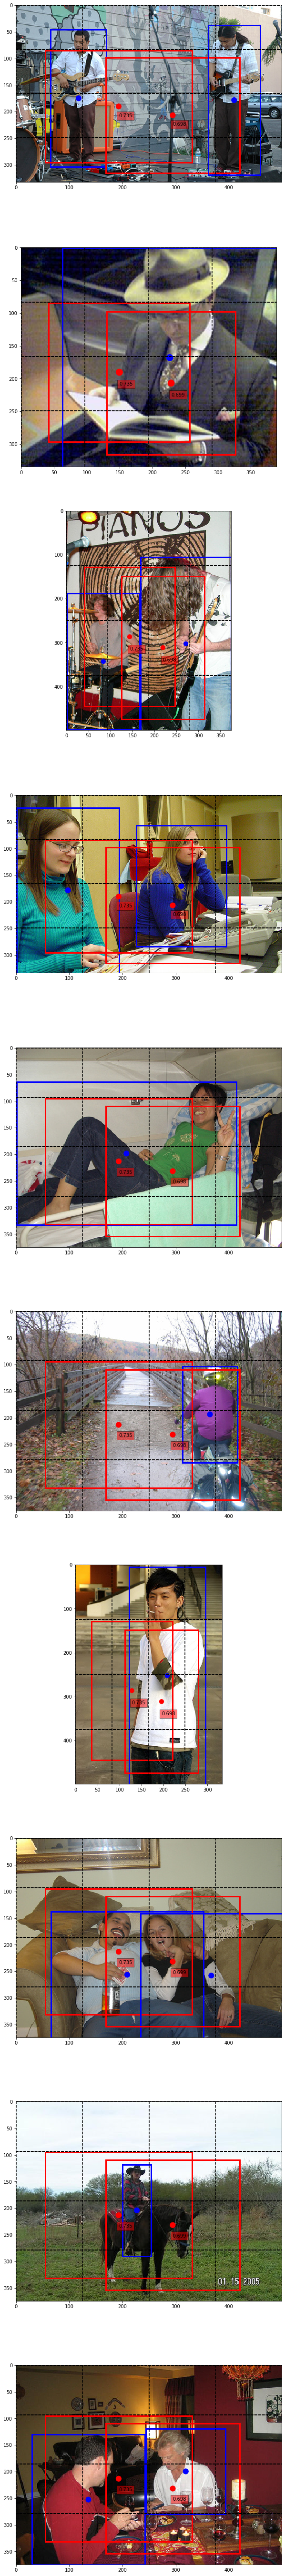

In [40]:
from src.data.VOC2012.plot import plot_grid
from src.models.DataGen import DataGenGrid
from src.models.metrics import precision, recall, true_positives, false_negative, positives
datagen = DataGenGrid()
num_predictions = 10

pred = model.predict_generator(datagen.flow_test(df_test))
print('TP', K.sum(true_positives(K.constant(np.stack(df_test['grid_output'].values)), K.constant(pred)), axis=0))
print('P', K.sum(positives(K.constant(np.stack(df_test['grid_output'].values)), K.constant(pred)), axis=0))
print('FN', K.sum(false_negative(K.constant(np.stack(df_test['grid_output'].values)), K.constant(pred)), axis=0))
print('PRECISION',K.mean(precision(K.constant(np.stack(df_test['grid_output'].values)), K.constant(pred))))
print('RECALL', K.mean(recall(K.constant(np.stack(df_test['grid_output'].values)), K.constant(pred))))

x_test = df_test.sample(num_predictions)
pred = model.predict_generator(datagen.flow_test(x_test))

plt.subplots(min(num_predictions, 20), 1, figsize=(10, min(num_predictions, 20)*10))
for i in range(min(num_predictions, 20)):
    plt.subplot(min(num_predictions, 20), 1, i+1)
    plot_grid(x_test, x_test.index[i], np.array(pred[i][0]), config, plot_ground_truth=True, default_color='r')
plt.show()